In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("All_Crypto.csv")
df.head()

,Sno,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,05-10-2020 23:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,06-10-2020 23:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,07-10-2020 23:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,08-10-2020 23:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,09-10-2020 23:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [11]:
grouped = df.groupby(df.Name)

# bitcoin = grouped.get_group("Bitcoin")
bitcoin = grouped.get_group("Litecoin")
# bitcoin = grouped.get_group("Stellar")
# bitcoin = grouped.get_group("Binance Coin")

bitcoin.head(-1)

,Sno,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
17117,17118,Litecoin,LTC,29-04-2013 23:59,4.573600,4.225640,4.366760,4.383900,0.000000e+00,7.538896e+07
17118,17119,Litecoin,LTC,30-04-2013 23:59,4.572380,4.168960,4.403520,4.296490,0.000000e+00,7.402092e+07
17119,17120,Litecoin,LTC,01-05-2013 23:59,4.356860,3.520290,4.289540,3.801010,0.000000e+00,6.560460e+07
17120,17121,Litecoin,LTC,02-05-2013 23:59,4.039300,3.007170,3.780020,3.371980,0.000000e+00,5.828798e+07
17121,17122,Litecoin,LTC,03-05-2013 23:59,3.453610,2.395940,3.390440,3.044910,0.000000e+00,5.269485e+07
...,...,...,...,...,...,...,...,...,...,...
20102,20103,Litecoin,LTC,01-07-2021 23:59,144.136637,134.406025,144.136637,137.577528,1.681325e+09,9.183632e+09
20103,20104,Litecoin,LTC,02-07-2021 23:59,138.787700,130.935471,137.299274,136.943696,1.418981e+09,9.141322e+09
20104,20105,Litecoin,LTC,03-07-2021 23:59,141.356011,134.945288,136.930584,140.279688,1.236494e+09,9.364008e+09
20105,20106,Litecoin,LTC,04-07-2021 23:59,147.836059,137.096427,140.317998,144.905849,1.431657e+09,9.672815e+09


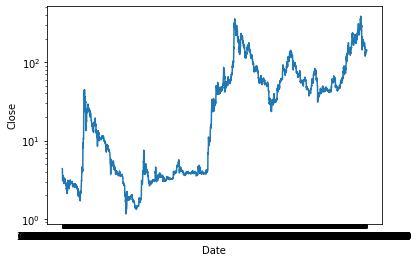

In [4]:
x = bitcoin["Date"].tolist()
y = bitcoin["Close"].tolist()

plt.plot(x,y,label = "Bitcoin")
plt.xlabel('Date')
plt.ylabel('Close')
plt.yscale("log")

# x = litecoin["Date"].tolist()
# y = litecoin["Close"].tolist()
# plt.plot(x,y,label = "Litecoin")
# plt.xlabel('Date')
# plt.ylabel('Close')
# plt.yscale("log")

plt.show()



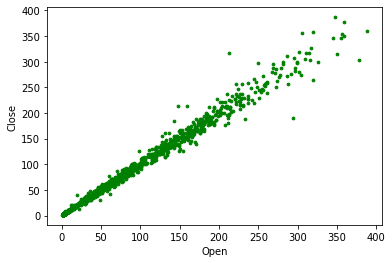

In [5]:
x = bitcoin["Open"].tolist()
y = bitcoin["Close"].tolist()
plt.scatter(x, y, label= "dots", color= "green",
            marker= ".", s=30)
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

In [6]:
# train, test = train_test_split(bitcoin, test_size=0.2)
split_row = len(bitcoin) - int(0.20 * len(bitcoin))
train = bitcoin.iloc[:split_row]
test = bitcoin.iloc[split_row:]

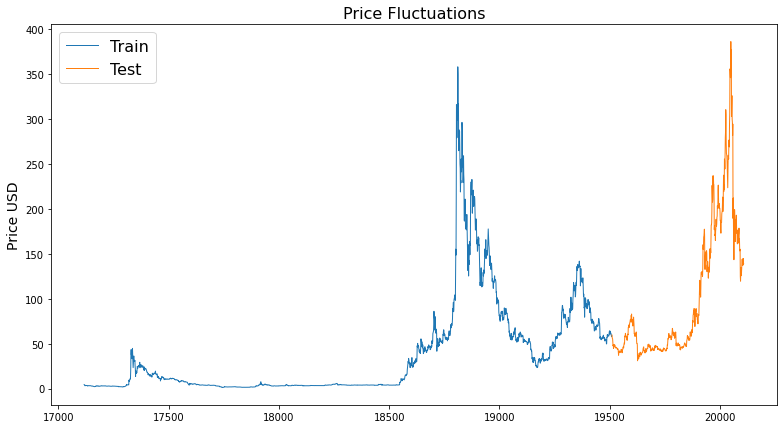

In [25]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train['Close'], label='Train', linewidth=1)
ax.plot(test['Close'], label='Test', linewidth=1)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('Price Fluctuations', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [9]:
coldata = bitcoin.iloc[:, 7:8].values
coltrain = train.iloc[:, 7:8].values
coltest = test.iloc[:, 7:8].values

shaped = np.reshape(coldata, (-1,1))
train_shape = np.reshape(coltrain, (-1,1))
test_shape = np.reshape(coltest, (-1,1))

In [12]:
sc = MinMaxScaler(feature_range = (0,1))
sc.fit(shaped)

scale_train = sc.transform(train_shape)
scale_test = sc.transform(test_shape)


In [13]:
X = []
y = []

steps = 50

for i in range(steps, len(train)):
    X.append(scale_train[i-steps:i,0])
    y.append(scale_train[i, 0])


X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse')

In [16]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, 
                    batch_size=32, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
59/59 [==============================] - 5s 51ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 2/100
59/59 [==============================] - 2s 40ms/step - loss: 0.0010 - val_loss: 8.6331e-04
Epoch 3/100
59/59 [==============================] - 2s 41ms/step - loss: 7.5037e-04 - val_loss: 8.5644e-04
Epoch 4/100
59/59 [==============================] - 2s 41ms/step - loss: 7.2634e-04 - val_loss: 6.8053e-04
Epoch 5/100
59/59 [==============================] - 2s 42ms/step - loss: 6.7115e-04 - val_loss: 6.3371e-04
Epoch 6/100
59/59 [==============================] - 2s 42ms/step - loss: 5.8913e-04 - val_loss: 7.0611e-04
Epoch 7/100
59/59 [==============================] - 3s 43ms/step - loss: 6.1080e-04 - val_loss: 7.5807e-04
Epoch 8/100
59/59 [==============================] - 2s 41ms/step - loss: 4.9593e-04 - val_loss: 5.4255e-04
Epoch 9/100
59/59 [==============================] - 2s 41ms/step - loss: 5.0481e-04 - val_loss: 5.2720e-04
Epoch 10/100
59/59 [====================

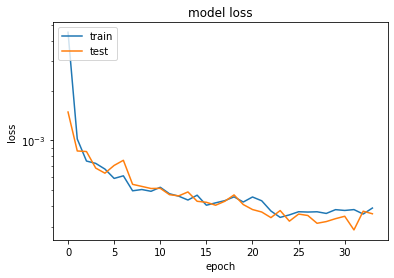

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log") 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
keys = ['Aave', 'Binance Coin', 'Bitcoin', 'Cardano', 'Chain Link', 
        'Cosmos', 'Crypto.com Coin', 'Dogecoin', 'EOS', 'Ethereum',
        'Iota', 'Litecoin', 'Monero', 'NEM', 'Polkadot', 'Solana', 
        'Stellar', 'Tether', 'Tron', 'Uniswap', 'USD Coin', 
        'Wrapped Bitcoin', 'XRP']
values =[(df.Name == 'Aave').sum(), (df.Name == 'Binance Coin').sum(), 
         (df.Name == 'Bitcoin').sum(), (df.Name == 'Cardano').sum(), 
         (df.Name == 'Chain Link').sum(), (df.Name == 'Cosmos').sum(), 
         (df.Name == 'Crypto.com Coin').sum(), (df.Name == 'Dogecoin').sum(), 
         (df.Name == 'EOS').sum(), (df.Name == 'Ethereum').sum(), 
         (df.Name == 'Iota').sum(), (df.Name == 'Litecoin').sum(), 
         (df.Name == 'Monero').sum(), (df.Name == 'NEM').sum(), 
         (df.Name == 'Polkadot').sum(), (df.Name == 'Solana').sum(), 
         (df.Name == 'Stellar').sum(), (df.Name == 'Tether').sum(), 
         (df.Name == 'Tron').sum(), (df.Name == 'Uniswap').sum(), 
         (df.Name == 'USD Coin').sum(), (df.Name == 'Wrapped Bitcoin').sum(), 
         (df.Name == 'XRP').sum()]

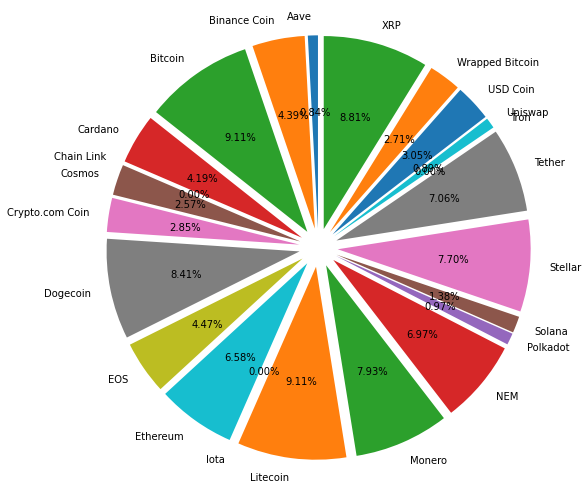

In [19]:
fig = plt.figure(figsize =(20, 7))
plt.pie(values, labels = keys,  startangle=90, shadow=False,explode=(0.1, 0.1, 0.1, 
                                                                    0.1, 0.1, 0.1, 
                                                                    0.1, 0.1, 0.1, 
                                                                    0.1, 0.1, 0.1, 
                                                                    0.1, 0.1, 0.1, 
                                                                    0.1, 0.1, 0.1, 
                                                                    0.1, 0.1, 0.1, 
                                                                    0.1, 0.1), autopct='%1.2f%%')
plt.tight_layout()

In [23]:
from keras.metrics import mean_absolute_error

X_testing = []
y_testing = []

for i in range(steps, len(test)):
    X_testing.append(scale_test[i-steps:i,0])
    y_testing.append(scale_test[i, 0])

X_testing, y_testing = np.array(X_testing), np.array(y_testing)
X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))

predicted_price = model.predict(X_testing)
inv_price = sc.inverse_transform(predicted_price)
real_price = np.reshape(y_testing, (-1,1))
real_price = sc.inverse_transform(real_price)

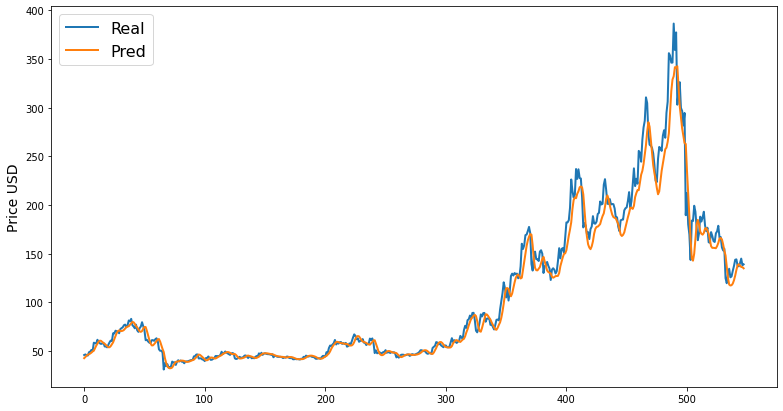

In [24]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(inv_price, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)